# Import niezbędnych bibliotek

In [1]:
import pandas as pd
import yfinance as yf
from yahooquery import Ticker
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm

% matplotlib inline

sns.set_style('darkgrid')

# Dane udostępniane przez bibliotekę portal Yahoo Finance na przykładzie firmy Apple

In [2]:
stocks = ['AAPL', 'JPM', 'PG', 'FDX', 'MMM', '^GSPC']

stocks_info = {}
key_stats_info = {}
for stock in stocks:
    stocks_info[stock] = Ticker(stock).summary_detail[stock]

info_df = pd.DataFrame(stocks_info)
key_stats_df = pd.DataFrame(key_stats_info)
info_df

,AAPL,JPM,PG,FDX,MMM,^GSPC
maxAge,1,1,1,1,1,1
priceHint,2,2,2,2,2,2
previousClose,172.07,134.32,155.74,221.27,98.01,4109.9
open,171.71,135.9,156.26,221.48,98.42,4122.85
dayLow,170.422,135.47,154.85,221.48,98.0,4113.62
dayHigh,172.15,136.88,156.56,222.74,98.586,4130.12
regularMarketPreviousClose,172.07,134.32,155.74,221.27,98.01,4109.9
regularMarketOpen,171.71,135.9,156.26,221.48,98.42,4122.85
regularMarketDayLow,170.422,135.47,154.85,221.48,98.0,4113.62
regularMarketDayHigh,172.15,136.88,156.56,222.74,98.586,4130.12


In [3]:
Ticker('AAPL').all_modules # JSON zawierający wszystkie dostępne moduły

{'AAPL': {'assetProfile': {'address1': 'One Apple Park Way',
   'city': 'Cupertino',
   'state': 'CA',
   'zip': '95014',
   'country': 'United States',
   'phone': '408 996 1010',
   'website': 'https://www.apple.com',
   'industry': 'Consumer Electronics',
   'industryDisp': 'Consumer Electronics',
   'sector': 'Technology',
   'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various serv

# Dane firm Apple, JP Morgan Chase & Co., Procter & Gamble Company, FedEx Corporation, 3M Company oraz indeksu S&P 500

In [4]:
last_ten_years = datetime.today() - timedelta(days=365*10)

start_date = last_ten_years
end_date = datetime.today()
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')
print('Start date: ', start_date_str, '\nEnd date: ', end_date_str)


data = {}

for stock in stocks:
    df = yf.download(stock, start=start_date_str, end=end_date_str, interval="1d")
    df.reset_index(inplace=True)
    df['Date'] = df['Date'].dt.strftime('%Y-%m-%d') # zmiana formatu daty do formatu YYYY-MM-DD
    df['Return'] = df['Adj Close'].pct_change() # obliczenie stopy zwrotu
    df['Log Return'] = np.log(df['Return'] + 1) # obliczenie zlogarytmizowanej stopy zwrotu
    df.to_csv('data/{}.csv'.format(stock))
    data[stock] = df

Start date:  2013-05-19 
End date:  2023-05-17
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
print('Liczba rekordów: ', len(data['AAPL']))
data['AAPL']

Liczba rekordów:  2516


,Date,Open,High,Low,Close,Adj Close,Volume,Return,Log Return
0,2013-05-20,15.425357,15.921429,15.360714,15.818929,13.733949,451578400,NaN,NaN
1,2013-05-21,15.648214,15.910000,15.507143,15.702143,13.632556,456022000,-0.007383,-0.007410
2,2013-05-22,15.858929,16.012501,15.650714,15.762500,13.684957,443038400,0.003844,0.003836
3,2013-05-23,15.569643,15.934286,15.563929,15.790714,13.709449,353021200,0.001790,0.001788
4,2013-05-24,15.744643,15.916429,15.727143,15.898214,13.802786,276166800,0.006808,0.006785
...,...,...,...,...,...,...,...,...,...
2511,2023-05-10,173.020004,174.029999,171.899994,173.559998,173.320267,53724500,0.010421,0.010367
2512,2023-05-11,173.850006,174.589996,172.169998,173.750000,173.510010,49514700,0.001095,0.001094
2513,2023-05-12,173.619995,174.059998,171.000000,172.570007,172.570007,45497800,-0.005418,-0.005432
2514,2023-05-15,173.160004,173.210007,171.470001,172.070007,172.070007,37266700,-0.002897,-0.002902


<AxesSubplot: title={'center': 'AAPL Daily Return'}>

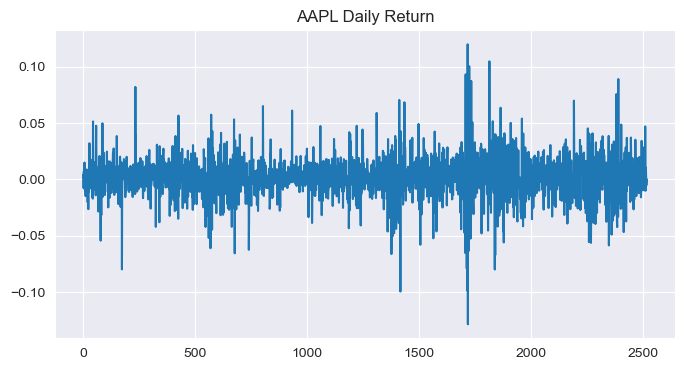

In [7]:
data['AAPL']['Return'].plot(figsize=(8,4), title='AAPL Daily Return')

# Sprawdzenie, czy zyski pochodzą z rozkładu normalnego

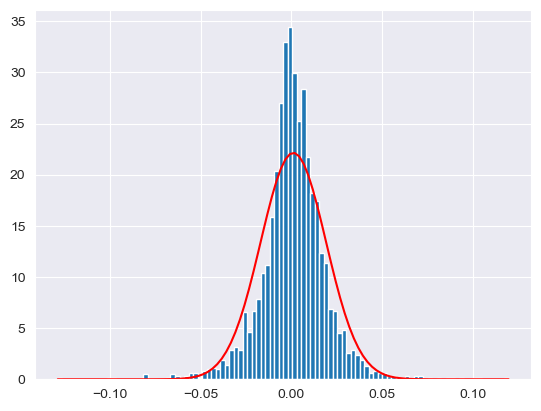

In [8]:
x_list = np.linspace(data['AAPL']['Return'].min(), data['AAPL']['Return'].max(), 100)
y_list = norm.pdf(x_list, data['AAPL']['Return'].mean(), data['AAPL']['Return'].std())
plt.plot(x_list, y_list, color='red')
data['AAPL']['Return'].hist(bins=100, density=True)
plt.show()

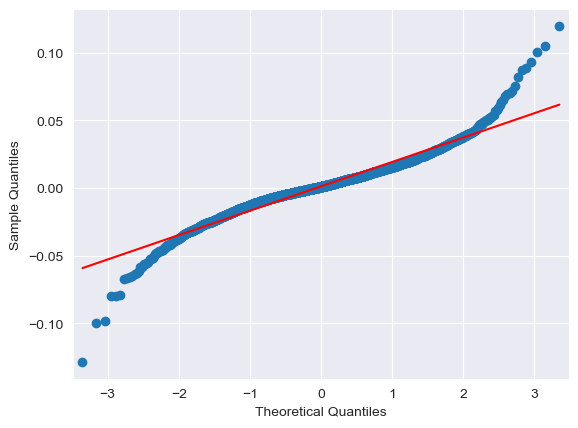

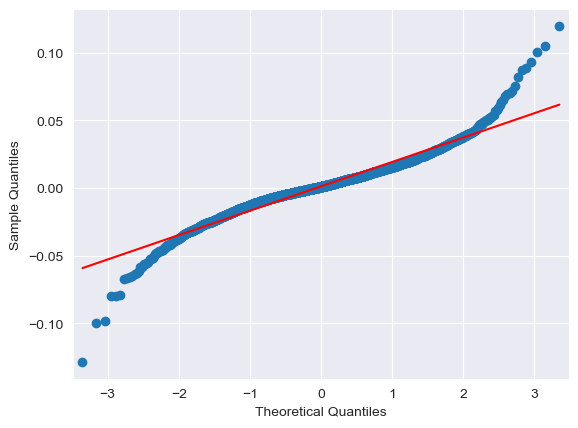

In [9]:
sm.qqplot(data['AAPL']['Return'].dropna(), line='s')

# Preprocessing danych
### Przygotowanie ich w odpowiednim formacie, walidacja i sprawdzenie wartości brakujących

In [10]:
# dates = pd.date_range(start=data['AAPL']['Date'].min(), end=data['AAPL']['Date'].max(), freq='D')
dates = data['AAPL']['Date']
close_prices = pd.DataFrame(index=dates)

for stock in data:
    df_tmp = pd.DataFrame(data[stock]['Adj Close'].to_numpy(), index=data[stock]['Date'], columns=[stock])
    close_prices = close_prices.join(df_tmp, how='left')

close_prices.to_csv('data/close_prices.csv')
close_prices

,AAPL,JPM,PG,FDX,MMM,^GSPC
Date,,,,,,
2013-05-20,13.733949,39.536797,59.161808,90.576416,82.970818,1666.290039
2013-05-21,13.632556,40.088760,58.944874,91.462631,83.186172,1669.160034
2013-05-22,13.684957,40.549980,58.959839,89.206718,82.749222,1655.349976
2013-05-23,13.709449,40.338287,58.870056,88.714371,82.465416,1650.510010
2013-05-24,13.802786,40.572662,61.248814,87.568527,82.360832,1649.599976
...,...,...,...,...,...,...
2023-05-10,173.320267,136.479996,154.029999,226.330002,100.900002,4137.640137
2023-05-11,173.510010,136.050003,154.389999,224.839996,100.779999,4130.620117
2023-05-12,172.570007,134.100006,155.960007,222.929993,100.269997,4124.080078


<AxesSubplot: title={'center': 'Close Prices'}, xlabel='Date'>

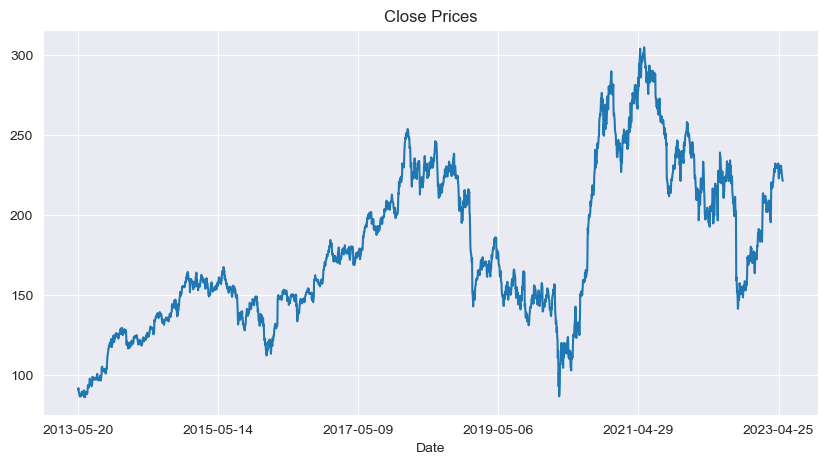

In [11]:
close_prices['FDX'].plot(figsize=(10, 5), title='Close Prices')

In [12]:
print('Liczba pustych komórek: ', close_prices.isna().sum().sum())
close_prices.isna().sum()

Liczba pustych komórek:  0


AAPL     0
JPM      0
PG       0
FDX      0
MMM      0
^GSPC    0
dtype: int64

In [13]:
close_prices.to_csv('data/close_prices_clean.csv')

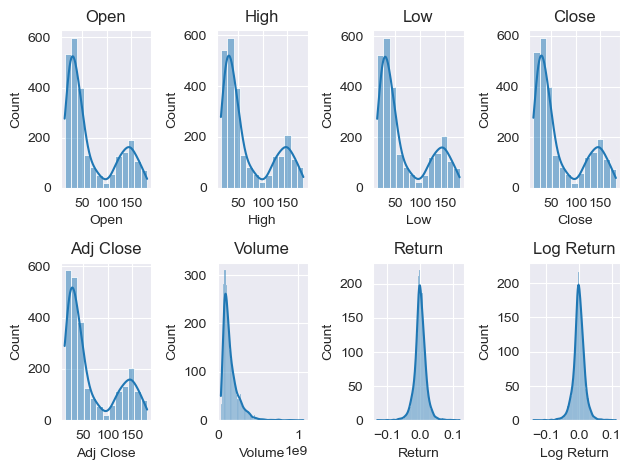

In [21]:
# drop "Date" column
aapl = data['AAPL'].drop(columns=['Date'])

for i, col in enumerate(aapl):
    plt.subplot(2,4,i+1)
    sns.histplot(aapl[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


# Wizualizacja wszystkich danych

## Cały dostępny okres - ostatnie 10 lat

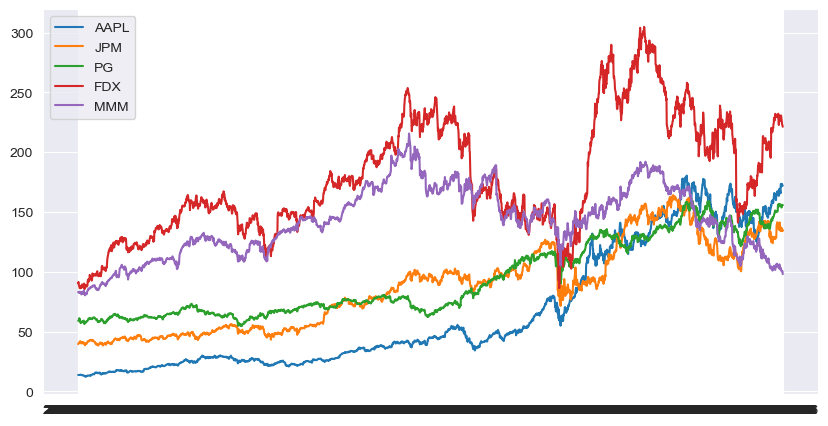

In [22]:
data_without_sp500 = stocks.copy()
data_without_sp500.remove('^GSPC')

plt.figure(figsize=(10, 5))
for stock in data_without_sp500:
    plt.plot(data[stock]['Date'], data[stock]['Adj Close'], label=stock)
    plt.legend(loc='upper left')


## Ostatnie 3 lata

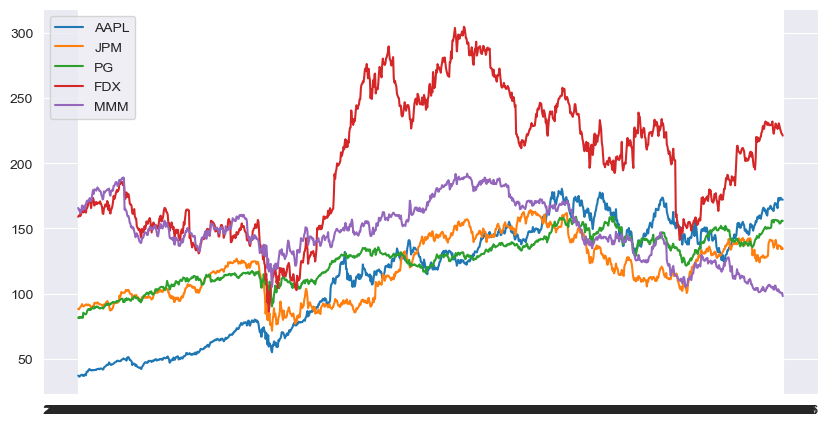

In [23]:
last_3_years = 365*3
plt.figure(figsize=(10, 5))
for stock in data_without_sp500:
    plt.plot(data[stock]['Date'][-last_3_years:], data[stock]['Adj Close'][-last_3_years:], label=stock)
    plt.legend(loc='upper left')

## Ostatnie 12 miesięcy

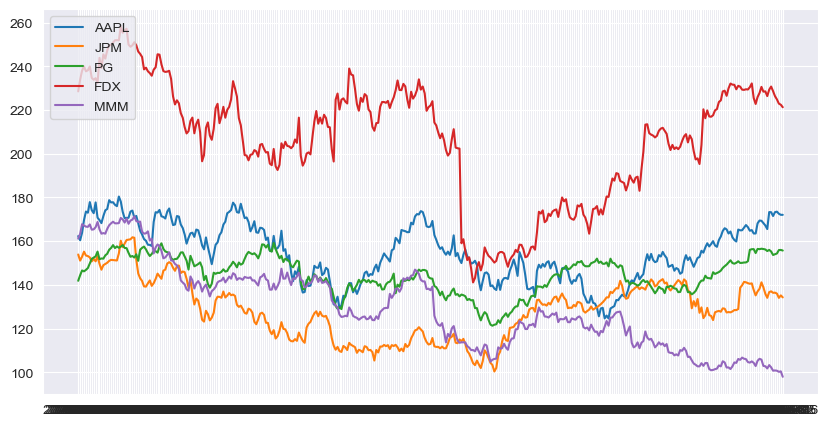

In [24]:
plt.figure(figsize=(10, 5))
for stock in data_without_sp500:
    plt.plot(data[stock]['Date'][-365:], data[stock]['Adj Close'][-365:], label=stock)
    plt.legend(loc='upper left')


# Symulacja kursu akcji

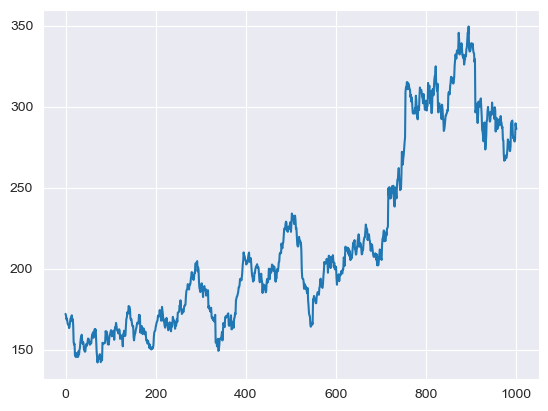

In [25]:
p0 = data['AAPL'].iloc[-1]['Adj Close']
prices = [p0]
returns = data['AAPL']['Return'].dropna()

for _ in range(1000):
    r = np.random.choice(returns)
    p = prices[-1] * (1 + r)
    prices.append(p)

plt.plot(prices)

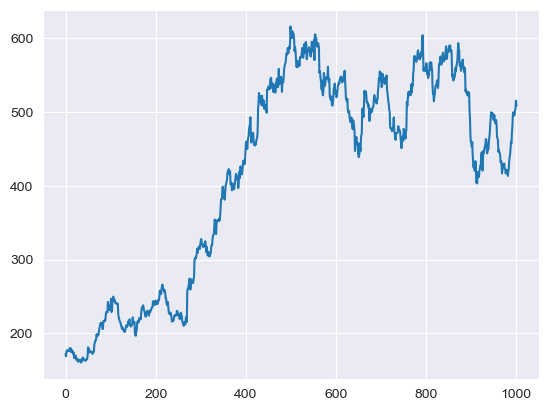

In [26]:
from scipy.stats import t

df, loc, scale = t.fit(data['AAPL']['Return'].dropna())
p0 = data['AAPL'].iloc[-1]['Adj Close']
prices = [p0]

for _ in range(1000):
    r = t.rvs(df, loc, scale)
    p = prices[-1] * (1 + r)
    prices.append(p)

plt.plot(prices)